# Practical Example - Linear Regression

### 1. Purpose
> ***Predict the price*** of a used car depending on its specs

### 2. Data Profiling
- Possibly strong ***explanatory variables***: ```Brand```, ```Mileage```, ```EngineV```, ```Year```
- ***Target:*** ```Price```

### 3. Process 

| Events | Table |
| ----- | -----|
| [***read_csv***](#Loading-the-data) | raw_data | 
| [***drop column ```Model```***](#Determining-the-variables-of-interest---Drop-column(s)) | data | 
| [***drop N/A***](#Dealing-with-missing-values) | data_no_mv|
| [***remove 1% higest outliers from ```Price```***](#1.1-Dealing-with-outliers-in-Price) | data_1 |
| [***remove 1% highest outliers from ```Mileage```***](#2.1-Dealing-with-outliers-in-Mileage) | data_2 |
| [***remove abnormal value from ```EngineV```***](#3.1-Remove-abnormal-value-of-EngineV) | data_3 |
| [***remove 1% oldest cars from ```Year```***](#4.1-Remove-most-vintage-car) | data_4 |
| [***reset_index for data_4***](#Final-table-for-preprocessing-step) | data_cleaned |
| [***apply log transformation for the target ```Price```***](#Relaxing-the-assumption) | data_cleaned (replace ```Price``` by ```log_price```) |
| [***check multicollinearity via VIF***](#Fifth-Assumption:-Multicollinearity) | data_no_multicolinearity |
| [***get dummies for categorical variables***](#Create-dummy-variables)  | data_with_dummy |
| [***rearrange***](#Rearrange-a-bit) | data_processed |


## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Turn all Matplotlib's graphs to Seaborn's

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings 
warnings.filterwarnings('ignore')


## Loading the data

In [2]:
raw_data = pd.read_csv("C:/Users/baoph/OneDrive - Seneca/Documents/365 Data Science/Machine Learning/Linear Regression Practical Example (Part 1) Dataset/1.04. Real-life example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.shape

(4345, 9)

## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include= 'all') # include descriptives for category var too

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


##### Some Notes:
- ***Misssing value***: Look at count row. ```Price``` and ```EngineV``` seems to be missing some of values

- ***Unique entries*** of each ```cat var```: ***```Model```*** has ***312 unique entries***, which is **hard to implement*** the regression (It means we have more than ***300 dummies***) 

- Number of car has been register ***```Registration``` = 'yes'*** is ***significantly high*** (***90%*** total of entries - almost all of them) **--> Won't be useful**

- A lot of the information from ```Model``` could be engineered from ```Brand```, ```Year```, and ```EngineV``` --> **Won't be losing too much variability**


### Determining the variables of interest - Drop column(s)

In [5]:
data = raw_data.drop(['Model'], axis=1) # Drop [Model] column
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [6]:
data.isnull().sum()/data.shape[0]*100 # % of missing values for each var

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
dtype: float64

##### Rule of thumb:
> If you are ***removing <5% of the observations***, you are free to ust remove all that have Missing Value

In [7]:
data_no_mv = data.dropna(axis=0) # Drop N/A by row

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

#### 1. Distribution of ```Price```

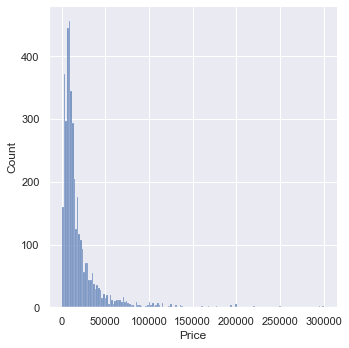

In [9]:
sns.displot(data_no_mv.Price) # Plot Price Distribution

##### Some Notes:

- ```Price``` has an ***exponential*** distribution

- For ***optimal results*** we would be looking for a ***normal distribution***

- We have a few ***outliers*** in ```Price``` --> **Remove the top 1% of observation**

#### 1.1 Dealing with outliers in ```Price```

In [10]:
q = data_no_mv.Price.quantile(0.99)
data_1 = data_no_mv[data_no_mv.Price < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


##### Some Notes:

- After removing outliers, the ***MAX(Price)*** is far away higher than the ***MEAN(Price)***, it is still acceptably closer

<AxesSubplot:xlabel='Price', ylabel='Density'>

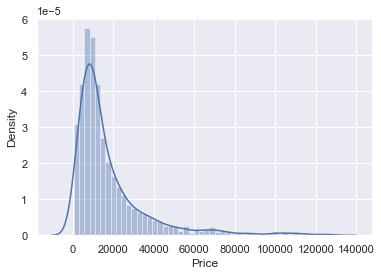

In [11]:
sns.distplot(data_1.Price)

#### 2. Distribution of ```Mileage```

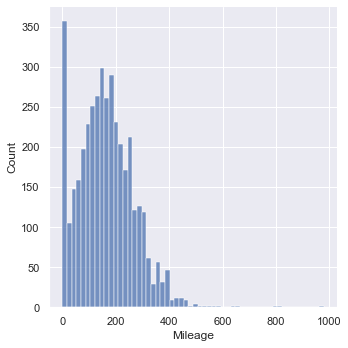

In [12]:
sns.displot(data_no_mv.Mileage) 

#### 2.1 Dealing with outliers in ```Mileage```

In [13]:
q_1 = data_1.Mileage.quantile(0.99)
data_2 = data_1[data_1.Mileage < q_1]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

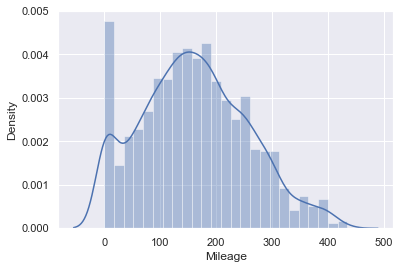

In [14]:
sns.distplot(data_2.Mileage)

#### 3. Distribution of ```EngineV```

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

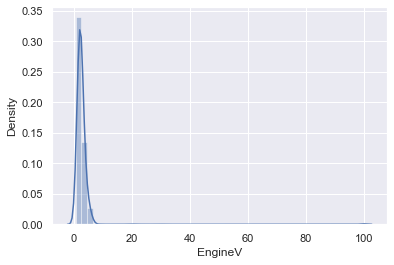

In [15]:
sns.distplot(data_no_mv.EngineV)

##### Some Notes: 

- Take a look at ```EngineV``` we see there is many ***strange*** value like ***99.99***. The interval of the ```EngineV``` normally low ***[0.6; 6.5]*** **--> 99.99 is incorrect entry** (That's a common way to label missing values)
**--> Chose the engine volumn below 6.5**

In [16]:
EngV = pd.DataFrame(raw_data.EngineV)
EngV = EngV.dropna(axis=0)
EngV.sort_values(by="EngineV")

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


#### 3.1 Remove abnormal value of ```EngineV```

In [17]:
data_3 = data_2[data_2.EngineV < 6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

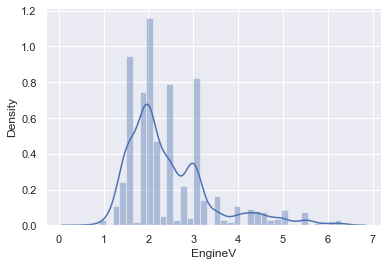

In [18]:
sns.distplot(data_3.EngineV)

#### 4. Distribution of ```Year```

<AxesSubplot:xlabel='Year', ylabel='Density'>

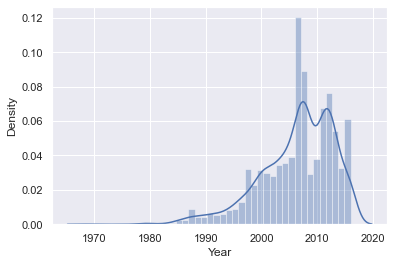

In [19]:
sns.distplot(data_3.Year)

#### 4.1 Remove most vintage car

In [20]:
q_3 = data_3.Year.quantile(0.01)
data_4 = data_3[data_3.Year>q_3]

<AxesSubplot:xlabel='Year', ylabel='Density'>

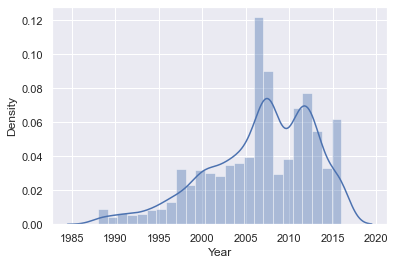

In [21]:
sns.distplot(data_4.Year)

In [22]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


### Final table for preprocessing step

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumption

### First Assumption: Linearity 

Text(0.5, 1.0, 'Price and Mileage')

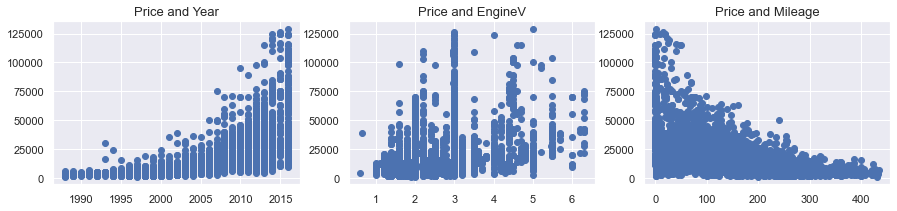

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))

axes[0].scatter(data_cleaned.Year, data_cleaned.Price)
axes[0].set_title("Price and Year", fontsize=13)

axes[1].scatter(data_cleaned.EngineV, data_cleaned.Price)
axes[1].set_title("Price and EngineV", fontsize=13)

axes[2].scatter(data_cleaned.Mileage, data_cleaned.Price)
axes[2].set_title("Price and Mileage", fontsize=13)

##### Some Notes:

- We can spot the patterns but definitely not Linear one **--> Should not run Linear Regression this case (Assumption 1)**

--> Should first **transform one or more variables**
--> **Log Tranformation** is especially useful when dealing with exponential scatter plots like we do now

<AxesSubplot:xlabel='Price', ylabel='Density'>

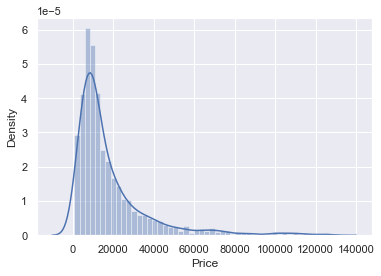

In [25]:
sns.distplot(data_cleaned.Price)

##### Some Notes:
- ```Price``` is ***not normally distributed***

**--> It's relationship with other normally distributed features is not linear** (quite exponential in those cases) 

### Relaxing the assumption

In [26]:
log_price = np.log(data_cleaned.Price)
data_cleaned["log_price"] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


##### Some Notes: 
- Now ```log_price``` distribution is approiximately ***bell-shaped***
- We can see the ***linear patterns*** in all plots now

<AxesSubplot:xlabel='log_price', ylabel='Density'>

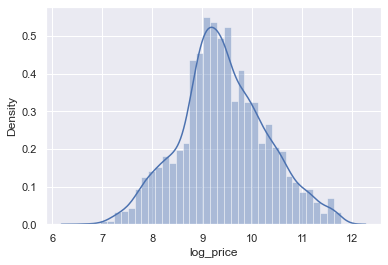

In [27]:
sns.distplot(data_cleaned.log_price)

Text(0.5, 1.0, 'log_price and Mileage')

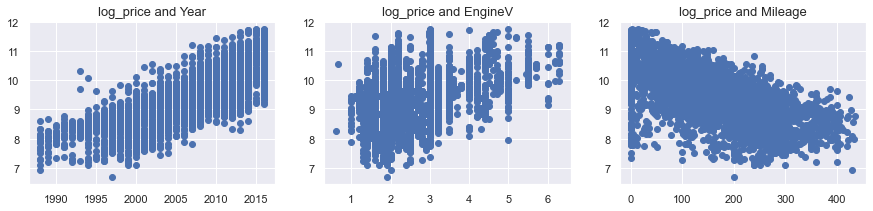

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))

axes[0].scatter(data_cleaned.Year, data_cleaned.log_price)
axes[0].set_title("log_price and Year", fontsize=13)

axes[1].scatter(data_cleaned.EngineV, data_cleaned.log_price)
axes[1].set_title("log_price and EngineV", fontsize=13)

axes[2].scatter(data_cleaned.Mileage, data_cleaned.log_price)
axes[2].set_title("log_price and Mileage", fontsize=13)

In [29]:
data_cleaned = data_cleaned.drop("Price", axis=1)

### Second Assumption: No Endogeneity

### Third Assumption: Normality and Homoscedasticity

- ***Normality and zero mean***: $residual-N(0,var^2)$
- ***Homoscedasticity***: as we can see from the graphs, because we already implemented a log transformation.

### Fourth Assumption: No Autocorrelation
- The observations we have are ***not coming from time series data or panel data***, so do not need too much effort on that
- There is no reason for the observations to be dependent on each other in this car sales case

### Fifth Assumption: Multicollinearity
- It is logical that ```Year``` and ```Mileage``` will be correlated. The newer the car. the lower its mileage

---> **Have ground to suspect some degree of multicilinearity in the data**

---> Check multicolinearity through ***Variance Inflation Factor (VIF)***.
> VIF produces a measure that estimates how much larger the square root of the standard error of an estimate is compared to a situation where the variable is completely uncorrelated to the other predictors

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[["Mileage","Year","EngineV"]]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [31]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [32]:
data_no_multicollinearity = data_cleaned.drop("Year", axis=1)

$VIF \in [1, inf)$

- $VIF = 1$: **No Multicollinearity**
- $1 < VIF < 5$: **Perfectly okay** 
- $5/6/10 < VIF$: **unacceptable** (cut-off line varies from sources to sources)

##### Some Notes:
- It seems like ```Year``` is defintely ***too correlated with the other variables*** **---> Only remove ```Year```**

## Create dummy variables 

In [33]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

##### Some Notes:

- ```Drop_first = True``` to make sure that it ***won't create data for the first items of each category***

- If not, we are introducing ***multicolinearity*** to the model


In [34]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Check the VIF of the features including the dummies

In [35]:
data_with_dummies_branch = data_with_dummies.copy()
data_with_dummies_branch = data_with_dummies_branch.drop("log_price", axis=1)

In [36]:
VIF = pd.DataFrame()

variables = data_with_dummies_branch

VIF["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
VIF["features"] = variables.columns

In [37]:
VIF

,VIF,features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


In [38]:
VIF[VIF['VIF'] > 5]

,VIF,features
1,7.841729,EngineV
16,9.641446,Registration_yes


##### Some Notes:
- We can drop the ```Registration_yes``` columns to optimize the model 

### Rearrange a bit

In [39]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [40]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [41]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Linear Regression Model

### Declare the inputs and the targets

In [42]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale input variables - Standardization

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [44]:
inputs_scaled = scaler.transform(inputs)

##### Some Notes: 
- It is not usually recommended to standardize dummy variables 
>Scaling has no effect on the predictive power of dummies. Ince scaled, though, they lose all their dummy meaning.

### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [46]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

##### Some Notes: 
- In fact, this is a ***log-linear regression*** as the dependent variables is the log of ```Price```

In [47]:
y_hat = reg.predict(x_train)

### Check performance visually  

(6.0, 13.0)

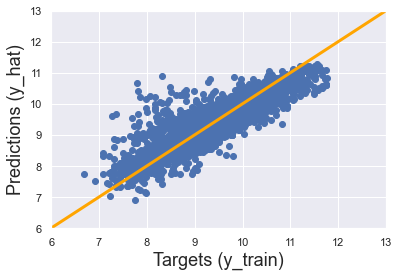

In [48]:
x = np.linspace(0,13)
y = x
plt.plot(x,y, c="orange", lw=3)

plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", fontsize=18)
plt.ylabel("Predictions (y_hat)", fontsize=18)
plt.xlim(6,13)
plt.ylim(6,13)


##### Some Notes:
- The more close the datapoint (```Targets``` & ```predictions```) to the 45-degree line, the better the model

Text(0.5, 1.0, 'Residuals PDF')

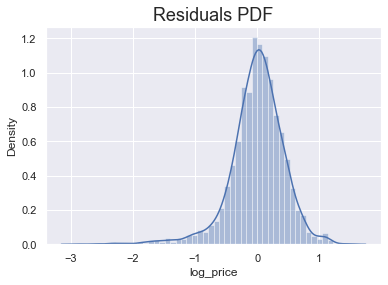

In [49]:
sns.distplot(y_train-y_hat)
plt.title("Residuals PDF", size=18)

##### Some Notes: 
- When $Residuals$ ~ $N(0, var^2)$ --> Better the performance **(Normality and Homoscedasticity assumption)**
- There are quite **a much longer tails on the left side*** ---> There are certain observations for which ```y_train``` - ```y_hat``` is much lower than the mean (a much higher price is predicted than is observed) 

---> ```Predictions``` tend to **overestimate the ```targets```** and **rarely underestimate the ```targets```**

### R-Squared

In [50]:
reg.score(x_train, y_train)

0.744996578792662

### Finding the weights and bias

In [51]:
reg.intercept_

9.415239458021299

In [52]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [53]:
reg_summary = pd.DataFrame(columns = ["Features"], data=inputs.columns)
reg_summary["weights"] = reg.coef_
reg_summary

,Features,weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


### Testing 

In [54]:
y_hat_test = reg.predict(x_test)

(6.0, 13.0)

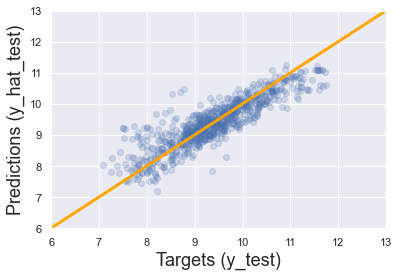

In [55]:
plt.plot(x,y,c="orange",lw=3)

plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_test)", fontsize=18)
plt.ylabel("Predictions (y_hat_test)", fontsize=18)
plt.xlim(6,13)
plt.ylim(6,13)


##### Some Notes:
- For higher prices, we have a high concentration of values around the 45-degree line ---> Our model is very good at predicting higher prices
- For the lower ones, it looks not so amazing, much more scatterd

Text(0.5, 1.0, 'Residual PDF - Test')

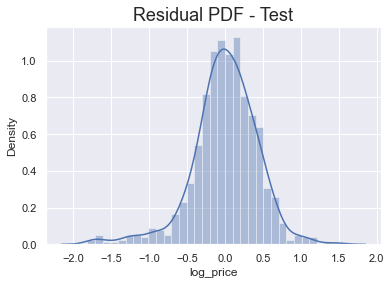

In [56]:
sns.distplot(y_test - y_hat_test)
plt.title("Residual PDF - Test", fontsize=18) 

### R-Squared

In [57]:
reg.score(x_test, y_test)

0.7726984972665858

In [58]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Prediction"])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [59]:
df_pf["Target"] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


In [60]:
y_test = y_test.reset_index(drop=True)
y_test

0       7.740664
1       7.937375
2       7.824046
3       8.764053
4       9.121509
         ...    
769    10.292146
770     9.169518
771     9.814656
772    11.134589
773     9.287301
Name: log_price, Length: 774, dtype: float64

In [61]:
df_pf["Target"] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [62]:
df_pf["Residual"] = df_pf["Target"] - df_pf["Prediction"]
df_pf

,Prediction,Target,Residual
0,10685.501696,2300.0,-8385.501696
1,3499.255242,2800.0,-699.255242
2,7553.285218,2500.0,-5053.285218
3,7463.963017,6400.0,-1063.963017
4,11353.490075,9150.0,-2203.490075
...,...,...,...
769,29651.726363,29500.0,-151.726363
770,10732.071179,9600.0,-1132.071179
771,13922.446953,18300.0,4377.553047
772,27487.751303,68500.0,41012.248697


In [63]:
df_pf["Difference%"] = np.absolute(df_pf["Residual"]/df_pf["Target"]*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [64]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


##### Some Notes: 
- The min difference in percentage is 0.06%
- The max difference in percentage is pretty off mark
- For the most of our predictions, we got relatively close (based on percentiles)

**---> The lower the difference% we got, the better**


In [65]:
# Set diplay max_rows 
# pd.options.display.max_rows = 999

# set display float_format 2 significant number
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# sort values by Difference%
df_pf.sort_values(by=["Difference%"])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
...,...,...,...,...
657,32481.05,6000.00,-26481.05,441.35
162,9954.42,1800.00,-8154.42,453.02
451,35956.50,6500.00,-29456.50,453.18
532,10019.90,1800.00,-8219.90,456.66


##### Some Notes:  
> In those last samples ```predictions``` are higher than ```targets``` ---> Maybe we are missing an important factor which drives the price of a used car lower, which maybe the ```car_model``` that we removed or maybe that car was damaged in some way (the information that we did not initally have)

#### How to improve our model?
1. Use a different set of variables 
2. Remove a bigger part of the ourliers in observations
3. Use different kind of transformations